# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [32]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import copy

In [33]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

In [34]:
print("x_tarin:", end=" ")
print(x_train)
print(type(x_train))
print("x_tarin size: " + str(len(x_train)))
print("y_tarin:", end=" ")
print(y_train)
print(type(y_train))
print("y_tarin size: " + str(len(y_train)))
print("x_test:", end=" ")
print(x_test)
print(type(x_test))
print("x_test size: " + str(len(x_test)))
print("y_test:", end=" ")
print(y_test)
print(type(y_test))
print("y_test size: " + str(len(y_test)))

x_tarin: [[-0.9996463024548754, 0.9992927300117043, -0.9989392826262382, 0.9985859602542448, -0.998232762851507, 0.9978796903738235, -0.9975267427770086, 0.9971739200168922, -0.9968212220493199, 0.996468648830153, -0.9961162003152682, 0.9957638764605578, -0.9954116772219299, 0.9950596025553082, -0.9947076524166317, 0.9943558267618553, -0.9940041255469493, 0.9936525487278997, -0.9933010962607077, 0.9929497681013908, -0.9925985642059812, 0.9922474845305274, -0.9918965290310929, 0.991545697663757, -0.9911949903846144], [-0.98992415264723, 0.9799498279943363, -0.9700760031140921, 0.9603016653861293, -0.9506258123930879, 0.9410474518178121, -0.9315656013415826, 0.9221792885433735, -0.9128875508001244, 0.9036894351880183, -0.8945839983847529, 0.8855703065727974, -0.8766474353436242, 0.8678144696029045, -0.8590705034766606, 0.8504146402183624, -0.8418459921169614, 0.8333636804058497, -0.8249668351727377, 0.8166545952704395, -0.8084261082285563, 0.8002805301660515, -0.7922170257047045, 0.78423

In [35]:
x_train = np.array(x_train)
print(x_train)
type(x_train)

[[-9.99646302e-01  9.99292730e-01 -9.98939283e-01 ... -9.91896529e-01
   9.91545698e-01 -9.91194990e-01]
 [-9.89924153e-01  9.79949828e-01 -9.70076003e-01 ... -7.92217026e-01
   7.84234768e-01 -7.76332938e-01]
 [-9.76858006e-01  9.54251563e-01 -9.32168279e-01 ... -5.83610530e-01
   5.70104618e-01 -5.56911261e-01]
 ...
 [ 6.04198397e-01  3.65055703e-01  2.20566071e-01 ...  9.27107475e-06
   5.60156851e-06  3.38445871e-06]
 [ 6.04891299e-01  3.65893483e-01  2.21325784e-01 ...  9.51872454e-06
   5.75779365e-06  3.48283928e-06]
 [ 6.09348519e-01  3.71305618e-01  2.26254528e-01 ...  1.12697032e-05
   6.86717695e-06  4.18450410e-06]]


numpy.ndarray

In [36]:
x_test = np.array(x_test)
print(x_test)
type(x_test)

[[6.30231669e-01 3.97191956e-01 2.50322949e-01 ... 2.44627407e-05
  1.54171939e-05 9.71640383e-06]
 [6.67009573e-01 4.44901771e-01 2.96753740e-01 ... 9.01649077e-05
  6.01408566e-05 4.01145271e-05]
 [6.67586012e-01 4.45671083e-01 2.97523781e-01 ... 9.19742480e-05
  6.14007214e-05 4.09902627e-05]
 ...
 [9.84908009e-01 9.70043787e-01 9.55403895e-01 ... 7.04855984e-01
  6.94218304e-01 6.83741168e-01]
 [9.88519560e-01 9.77170921e-01 9.65952569e-01 ... 7.66762999e-01
  7.57960223e-01 7.49258506e-01]
 [9.91845249e-01 9.83756998e-01 9.75734705e-01 ... 8.28342798e-01
  8.21587869e-01 8.14888025e-01]]


numpy.ndarray

In [37]:
y_train = np.array(y_train)
print(y_train)
type(y_train)

[ 3.77365369  3.7897491   3.80582783  3.8084264   3.81302388  3.81317814
  3.8134243   3.81903612  3.82000363  3.81998924  3.81084374  3.80617079
  3.80366033  3.80140921  3.80066449  3.74563337  3.7438018   3.73167821
  3.71877636  3.7106913   3.70920439  3.70903034  3.66962176  3.6439347
  3.63236899  3.58768014  3.55699973  3.54976491  3.53994823  3.49562457
  3.45646363  3.44183707  3.4393562   3.42837539  3.40026635  3.3253344
  3.32508403  3.15101861  3.13954998  3.13381942  3.13064054  3.09515774
  3.09154701  3.06919095  2.9593612   2.9309091   2.93017828  2.85459711
  2.83578162  2.7616863   2.75907282  2.73918946  2.65330243  2.51477168
  2.50473195  2.48096135  2.45013898  2.42617806  2.31716132  2.24777036
  2.2269613   2.15402137  2.12718912  2.12033056  2.09499005  1.94491491
  1.83619663  1.70609894  1.64029265  1.62722507  1.47362157  1.46285625
  1.38183027  1.37300332  1.35657977  1.32560597  1.20844525  1.20749836
  1.14128878  1.05695745  1.04535569  0.9953894   0.9

numpy.ndarray

In [38]:
y_test = np.array(y_test)
print(y_test)
type(y_test)

[-4.06440542 -4.26499827 -4.26817135 -4.27566582 -4.28203145 -4.2893044
 -4.30183946 -4.35558827 -4.3766262  -4.41451893 -4.41493154 -4.42706973
 -4.4442823  -4.48210761 -4.48470632 -4.50152377 -4.51515324 -4.58341836
 -4.68298906 -4.69970416 -4.70783429 -4.7161025  -4.76247781 -4.78665841
 -4.81163165 -4.85877104 -4.96053973 -4.98659561 -5.00605774 -5.01785003
 -5.04628023 -5.07819005 -5.1309652  -5.13334187 -5.15424253 -5.16221433
 -5.19387835 -5.32408693 -5.32997942 -5.33395918 -5.35121571 -5.37216652
 -5.41660023 -5.45713746 -5.52315774 -5.54698946 -5.54836092 -5.57030185
 -5.66153259 -5.67682266 -5.74889825 -5.74927123 -5.83953641 -5.881039
 -5.94264552 -5.99580327 -6.06103906 -6.07101263 -6.09073742 -6.10884391]


numpy.ndarray

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.3.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

***1.3.1.1***<br>
We have bandgap = y = W0 + W1 * x1 + W2 * x2 + W3 * x3 + ... + W25 * x25.
This function must be accommodated.The weight matrix = (W0,W1,W2,W3,...,W25
). As we have accomodated W0 in the W matrix so we need to to modify X = (X1, X2, X3,...,X25) to X = (1,X1,X2,X3,...,X25).  We start by randomly initialising the weights (W0, W1, W2, W3,...,W25).<br>
The gradient decent is calcuated via matrix algebra. The number of iterations to calcualte W is alreday fixed.The equation is as follows:<br>

A: Contains all data points (in a transposed way as taught in class)

W: Contains all weights

Y: Contains all bandgap

dJ/dW = AᵀAW - AᵀY<br>
W = W - (alpha/n)*(dJ/dW)<br>
The pediction Y=WT*X (where WT is Transpose of W)<br>
Different Learning rates are tested and the MSE is calculated.
The learning rate which gave best MSE is chosen for prediction.

In [39]:
# 1.3.1.2
# implement Linear Regression
class LinearRegressionFromScratch:
  def __init__(self, learning_rate=0.01, n_iterations=1000):
    self.loss = []
    self.n_iterations = n_iterations
    self.learning_rate = learning_rate
    self.weights = None
    self.bias = None
    

  @staticmethod
  def mean_squared_error(y, y_hat):
    error = 0
    for i in range(len(y)):
      error += (y[i] - y_hat[i]) ** 2
    mean_error = error/len(y)
    return mean_error
  
  def fit(self, X, y): # X = 5*3, y = 5*1
    # 1. Initialize weights and bias to zeros
    self.weights = np.zeros(X.shape[1]) # weights = 3*1
    self.bias = 0

    # 2. Perform gradient descent
    total_iterations = self.n_iterations
    for i in range(total_iterations):
      # Line equation
      # y_hat = np.dot(X, self.weights) + self.bias
      y_hat = (X @ self.weights) + self.bias # y_hat = 5*1
      loss = self.mean_squared_error(y, y_hat)
      self.loss.append(loss)

      # 3. Calculate derivatives
      # partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
      # partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))

      partial_w = (2 / X.shape[0]) * (X.T @ (y_hat - y)) # X = 5*3, X.T = 3*5, (y_hat - y) = 5*1, X.T * (y_hat - y) = 3*1
      partial_d = (2 / X.shape[0]) * (np.sum(y_hat - y)) 

      # 4. Update the coefficients
      self.weights = self.weights - self.learning_rate * partial_w
      self.bias = self.bias - self.learning_rate * partial_d

  def predict(self, X):
    # return np.dot(X, self.weights) + self.bias
    return ((X @ self.weights) + self.bias)


In [40]:
model = LinearRegressionFromScratch()
model.fit(x_train, y_train)
preds = model.predict(x_test)

In [41]:
# model.loss

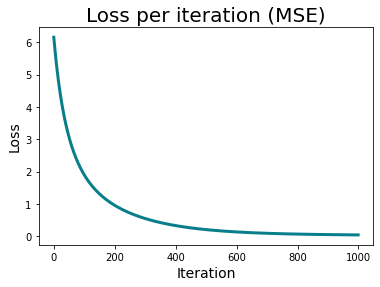

In [42]:
xs = np.arange(len(model.loss))
ys = model.loss

plt.plot(xs, ys, lw=3, c='#087E8B')
plt.title('Loss per iteration (MSE)', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.show()

In [43]:
# 1.3.2.3
# try with different learning rates and choose the best one

losses = {}
# learning_rates = [0.01,0.05,0.1,0.25,0.5]
# learning_rates = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.25,0.5,0.75,0.8,0.9] # inf from 1.0 onwards
learning_rates = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.25,0.5,0.75]
mse_list = []
lr_mse_combined = []

for lr in learning_rates:
  model = LinearRegressionFromScratch(learning_rate = lr)
  model.fit(x_train, y_train)
  losses[f'LR={str(lr)}'] = model.loss
  mse_list.append(str(losses['LR='+str(lr)][-1]))
  lr_mse_combined.append((losses['LR='+str(lr)][-1], lr))
  # print("Learning Rate: " + str(lr) + " -> MSE: " + str(losses['LR='+str(lr)][-1]))

# Printing the table 
from prettytable import PrettyTable
columns = ["Learning Rate", "Mean Square Error (MSE)"]

myTable = PrettyTable()

# Add Columns
myTable.add_column(columns[0], learning_rates)
myTable.add_column(columns[1], mse_list)

print(myTable)

# Finding out the best learning rate
print()
lr_mse_combined_sorted = copy.deepcopy(lr_mse_combined)
lr_mse_combined_sorted.sort()
print("Best Learning Rate: " + str(lr_mse_combined_sorted[0][1]))

+---------------+-------------------------+
| Learning Rate | Mean Square Error (MSE) |
+---------------+-------------------------+
|      0.01     |   0.04092343984048422   |
|      0.02     |   0.016179843198333706  |
|      0.03     |   0.01033647260500666   |
|      0.04     |  0.0075198898265559245  |
|      0.05     |   0.005786025312444656  |
|      0.06     |   0.004563110371587776  |
|      0.07     |  0.0036489209007709946  |
|      0.08     |  0.0029504009483823437  |
|      0.09     |   0.002412342004073924  |
|      0.1      |  0.0019965164607668594  |
|      0.25     |   0.000558409163359768  |
|      0.5      |  0.00041503947785049184 |
|      0.75     |  0.00032664952068682784 |
+---------------+-------------------------+

Best Learning Rate: 0.75


***Hence, best Learning Rate: 0.75, MSE: 0.00032664952068682784***

In [44]:
# Since best learning_rate = 0.75 for the dataset
model = LinearRegressionFromScratch(learning_rate=0.75)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("MSE for our Linear Regression Model: " + str(model.mean_squared_error(y_test, y_pred)))

MSE for our Linear Regression Model: 0.004525465915301589


In [45]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# lr_model = LinearRegression()
# lr_model.fit(x_train, y_train)
# lr_pred = lr_model.predict(x_test)

# print("MSE for sklearn library: " + str(mean_squared_error(y_test, y_pred)))

Learning rates: [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.25, 0.5, 0.75]
MSE: [0.04092343984048422, 0.016179843198333706, 0.01033647260500666, 0.0075198898265559245, 0.005786025312444656, 0.004563110371587776, 0.0036489209007709946, 0.0029504009483823437, 0.002412342004073924, 0.0019965164607668594, 0.000558409163359768, 0.00041503947785049184, 0.00032664952068682784]



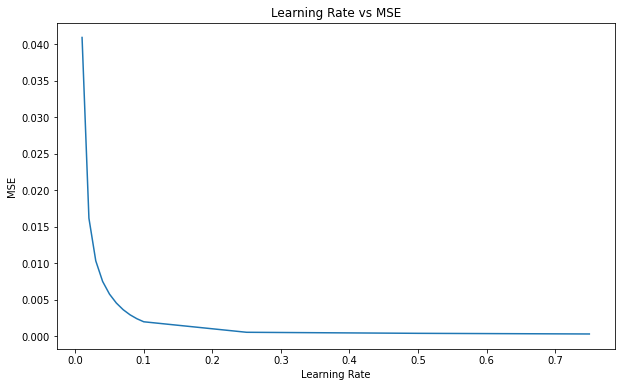

In [46]:
import matplotlib.pyplot as plt

xpoints = list()
ypoints = list()

for i in lr_mse_combined:
  xpoints.append(i[1])
  ypoints.append(i[0])

# xpoints = np.array(xpoints)
# ypoints = np.array(ypoints)

print("Learning rates: " + str(xpoints))
print("MSE: " + str(ypoints))
print()

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(xpoints, ypoints)
# ax.set_xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("MSE")
plt.title("Learning Rate vs MSE")
plt.show()

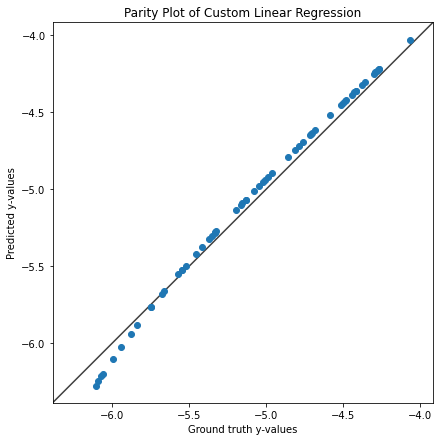

In [47]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`<br>
*Ridge regression is a similar to linear regression but here regularization is also implemented  It's uses L2 Norm for regularization. To avoid overfitting, we employ Ridge regression.*
*Ridge regression's cost function is as follows:<br>*
J(w) of Ridge = J(w) of linear regression + alpha*(Sum of square of weights)


In [48]:
# 1.3.2.2
# you should not have imported sklearn before this point
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import math

ridge_RMSE = []
alphas = [0.01, 0.1, 1, 5, 50, 100, 1000, 3000, 10000, 50000, 100000]
alpha_rmse_combined_ridge = []



for alpha in alphas:
  ridge_model = Ridge(alpha=alpha)
  ridge_model.fit(x_train,y_train)
  y_pred = ridge_model.predict(x_test)
  ans = math.sqrt(mean_squared_error(y_test, y_pred))
  ridge_RMSE.append(ans)
  alpha_rmse_combined_ridge.append((ans, alpha))


# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
from prettytable import PrettyTable
columns = ["Alpha", "RMSE"]

myTable = PrettyTable()

# Add Columns
myTable.add_column(columns[0], alphas)
myTable.add_column(columns[1], ridge_RMSE)

print(myTable)

# Finding out the best alpha
print()
alpha_rmse_combined_ridge_sorted = copy.deepcopy(alpha_rmse_combined_ridge)
alpha_rmse_combined_ridge_sorted.sort()
print("Best Alpha: " + str(alpha_rmse_combined_ridge_sorted[0][1]))

+--------+---------------------+
| Alpha  |         RMSE        |
+--------+---------------------+
|  0.01  | 0.30738707983011426 |
|  0.1   |  0.1093486199682714 |
|   1    | 0.07087132528643464 |
|   5    |  0.3620202732173133 |
|   50   |  2.4597269939837036 |
|  100   |  3.2066312850557335 |
|  1000  |   4.67482215489643  |
|  3000  |  4.8812297572434415 |
| 10000  |  4.961126526811382  |
| 50000  |  4.989571720590696  |
| 100000 |  4.9931670490947395 |
+--------+---------------------+

Best Alpha: 1


***Best alpha = 1, RMSE = 0.07087132528643464***

<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`<br>
*The regularization is a technique which penalizes the features in a model so that only the most important ones are kept. This is especially important when you have a dataset with 100,000 or more features to avoid overfitting.*

*The regularization parameter is defined by **Alpha**. The higher the alpha, the more weight is given to regularization. Although increasing alpha increases error minimally, it also helps to minimize overfitting.*

*When alpha = 0 it is same as no regularization is performed.*

As mentioned before, ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:

Objective = RSS + α * (sum of square of coefficients) [RSS: Residual Sum of Squares’ which is nothing but the sum of square of errors between the predicted and actual values in the training data set]<br>
Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

1. α = 0:
The objective becomes same as simple linear regression.
We’ll get the same coefficients as simple linear regression.<br>
2. α = ∞:
The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.<br>
3. 0 < α < ∞:
The magnitude of α will decide the weightage given to different parts of objective.<br>
The coefficients will be somewhere between 0 and ones for simple linear regression.

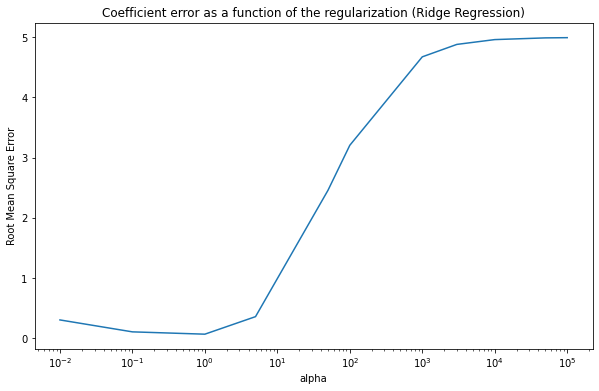

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, ridge_RMSE)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("Root Mean Square Error")
plt.title("Coefficient error as a function of the regularization (Ridge Regression)")

plt.show()

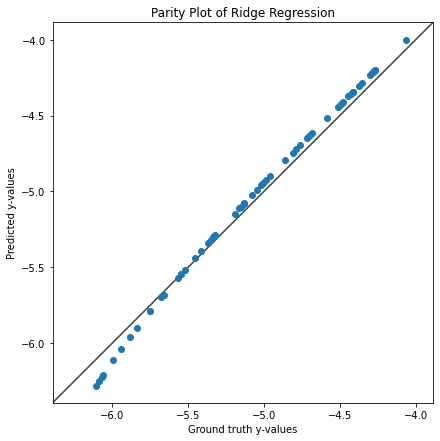

In [50]:
# 1.3.2.4
# Get the predictions of x_test into `y_pred`
# Since, alpha = 1 has lowest RMSE, we are using alpha = 1
model = Ridge(alpha = 1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# print(y_test)
# print(y_pred)

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Ridge Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`<br>
*Lasso regression is a similar to linear regression but here regularization is also implemented  It's uses L1 Norm for regularization. To avoid overfitting, and for feature selection we employ Lasso regression as it make redundant weights to 0.*
*Lasso regression's cost function is as follows:<br>*
J(w) of Lasso = J(w) of linear regression + alpha*(Sum of |weights|)

In [51]:
# 1.3.3.2
# you should not have imported sklearn before this point
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import math

lasso_RMSE = []
alphas = [0.01, 0.1, 1, 5, 50, 100, 1000, 3000, 10000, 50000, 100000]
apha_rmse_combined_lasso = []

for alpha in alphas:
  lasso_model = Lasso(alpha=alpha)
  lasso_model.fit(x_train,y_train)
  y_pred = lasso_model.predict(x_test)
  ans = math.sqrt(mean_squared_error(y_test, y_pred))
  lasso_RMSE.append(ans)
  apha_rmse_combined_lasso.append((ans, alpha))

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
from prettytable import PrettyTable
columns = ["Alpha", "RMSE"]

myTable = PrettyTable()

# Add Columns
myTable.add_column(columns[0], alphas)
myTable.add_column(columns[1], lasso_RMSE)

print(myTable)

# Finding out the best alpha
print()
apha_rmse_combined_lasso_sorted = copy.deepcopy(apha_rmse_combined_lasso)
apha_rmse_combined_lasso_sorted.sort()
print("Best Alpha: " + str(apha_rmse_combined_lasso_sorted[0][1]))

+--------+----------------------+
| Alpha  |         RMSE         |
+--------+----------------------+
|  0.01  | 0.042419962550167355 |
|  0.1   |  0.4143688074221509  |
|   1    |  4.269928072334981   |
|   5    |  4.996771333559856   |
|   50   |  4.996771333559856   |
|  100   |  4.996771333559856   |
|  1000  |  4.996771333559856   |
|  3000  |  4.996771333559856   |
| 10000  |  4.996771333559856   |
| 50000  |  4.996771333559856   |
| 100000 |  4.996771333559856   |
+--------+----------------------+

Best Alpha: 0.01


***Best alpha = 0.01, RMSE = 0.042419962550167355***

<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`<br>
*The regularization is a technique which penalizes the features in a model so that only the most important ones are kept. This is especially important when you have a dataset with 100,000 or more features to avoid overfitting.*

*The regularization parameter is defined by **Alpha**. The higher the alpha, the more weight is given to regularization. Although increasing alpha increases error minimally, it also helps to minimize overfitting.*

*When alpha = 0 it is same as no regularization is performed.*

Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

Objective = RSS + α * (sum of absolute value of coefficients)[RSS: Residual Sum of Squares’ which is nothing but the sum of square of errors between the predicted and actual values in the training data set]<br>
Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. Lets iterate it here briefly:

1. α = 0: Same coefficients as simple linear regression<br>
2. α = ∞: All coefficients zero (same logic as before)<br>
3. 0 < α < ∞: coefficients between 0 and that of simple linear regression

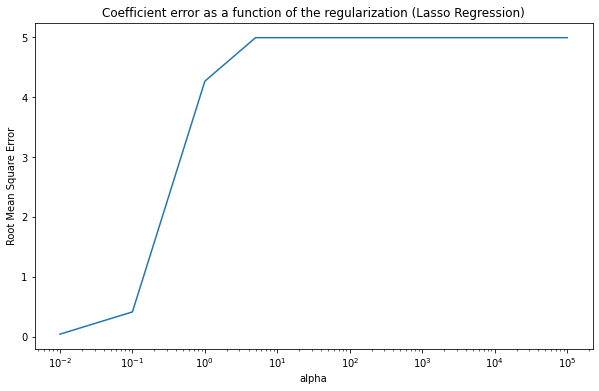

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, lasso_RMSE)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("Root Mean Square Error")
plt.title("Coefficient error as a function of the regularization (Lasso Regression)")

plt.show()

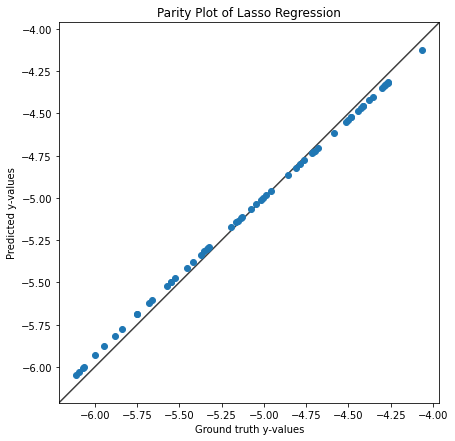

In [53]:
# 1.3.3.4
# Get the predictions of x_test into `y_pred`
# Since, alpha = 0.01 has lowest RMSE, we are using alpha = 0.01
model = Lasso(alpha = 0.01)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# print(y_test)
# print(y_pred)

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Lasso Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()